# Spike sorting with RMM

In [ ]:
#provare silhouette threshold =0.2

In [ ]:
import glob
list_dir=glob.glob("/Users/Gaia_1/Desktop/allh5filestutto/*.h5")
for file in list_dir:
    print(file)
print(len(list_dir))

2019-01-24T15-38-41MiP2 24hour after KA healthy modifiedname.h5 : target 0 stimulation 1
File Reading...
data shape:  (4229000, 60)
Data Filtering:


  0%|          | 0/59 [00:00<?, ?it/s]

Spike Detection: 


  0%|          | 0/59 [00:00<?, ?it/s]

44022  spikes detected;   firing rate: 104.10 Hz
45633  spikes detected;   firing rate: 107.90 Hz
45544  spikes detected;   firing rate: 107.69 Hz
45739  spikes detected;   firing rate: 108.16 Hz
45601  spikes detected;   firing rate: 107.83 Hz
35212  spikes detected;   firing rate: 83.26 Hz
38931  spikes detected;   firing rate: 92.06 Hz
36772  spikes detected;   firing rate: 86.95 Hz
37736  spikes detected;   firing rate: 89.23 Hz
36070  spikes detected;   firing rate: 85.29 Hz
29663  spikes detected;   firing rate: 70.14 Hz
30470  spikes detected;   firing rate: 72.05 Hz
28237  spikes detected;   firing rate: 66.77 Hz
27968  spikes detected;   firing rate: 66.13 Hz
24869  spikes detected;   firing rate: 58.81 Hz
25360  spikes detected;   firing rate: 59.97 Hz
28740  spikes detected;   firing rate: 67.96 Hz
31869  spikes detected;   firing rate: 75.36 Hz
31874  spikes detected;   firing rate: 75.37 Hz
28896  spikes detected;   firing rate: 68.33 Hz
33072  spikes detected;   firing ra

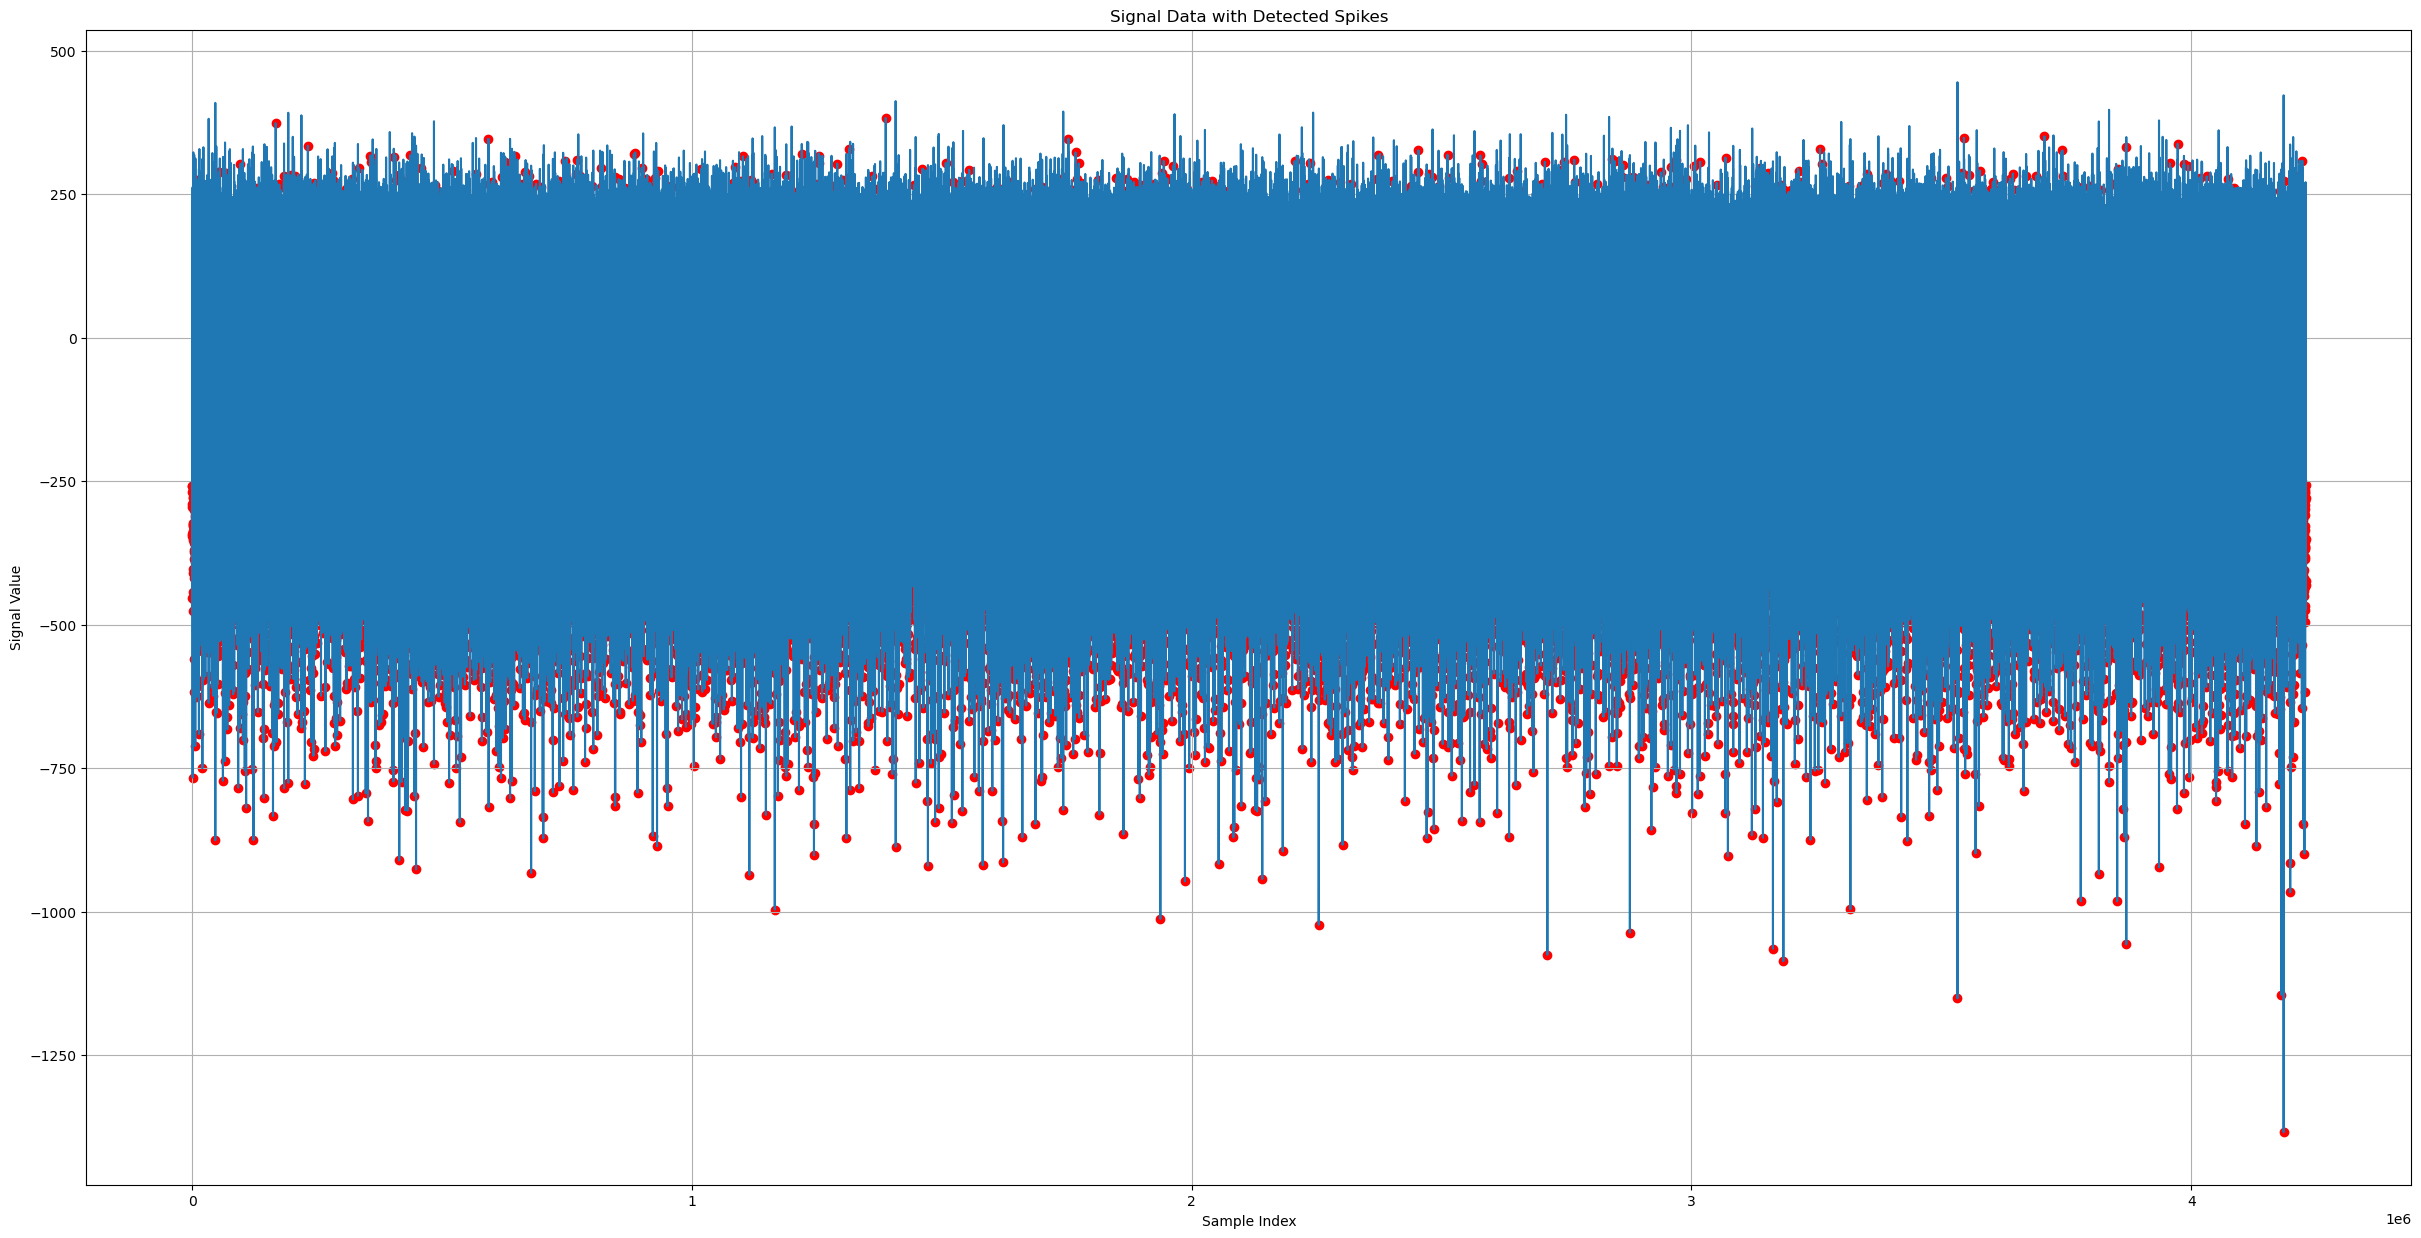

Spike extraction: 


  0%|          | 0/59 [00:00<?, ?it/s]

25980  spikes removed;   firing rate: 42.66 Hz
27005  spikes removed;   firing rate: 44.05 Hz
27066  spikes removed;   firing rate: 43.69 Hz
26975  spikes removed;   firing rate: 44.37 Hz
27445  spikes removed;   firing rate: 42.93 Hz
21122  spikes removed;   firing rate: 33.32 Hz
25148  spikes removed;   firing rate: 32.59 Hz
22264  spikes removed;   firing rate: 34.31 Hz
24351  spikes removed;   firing rate: 31.65 Hz
21972  spikes removed;   firing rate: 33.34 Hz
20427  spikes removed;   firing rate: 21.84 Hz
21018  spikes removed;   firing rate: 22.35 Hz
19412  spikes removed;   firing rate: 20.87 Hz
19258  spikes removed;   firing rate: 20.60 Hz
16825  spikes removed;   firing rate: 19.02 Hz
17376  spikes removed;   firing rate: 18.88 Hz
19985  spikes removed;   firing rate: 20.70 Hz
21998  spikes removed;   firing rate: 23.34 Hz
22085  spikes removed;   firing rate: 23.15 Hz
19920  spikes removed;   firing rate: 21.22 Hz
23942  spikes removed;   firing rate: 21.59 Hz
23740  spikes

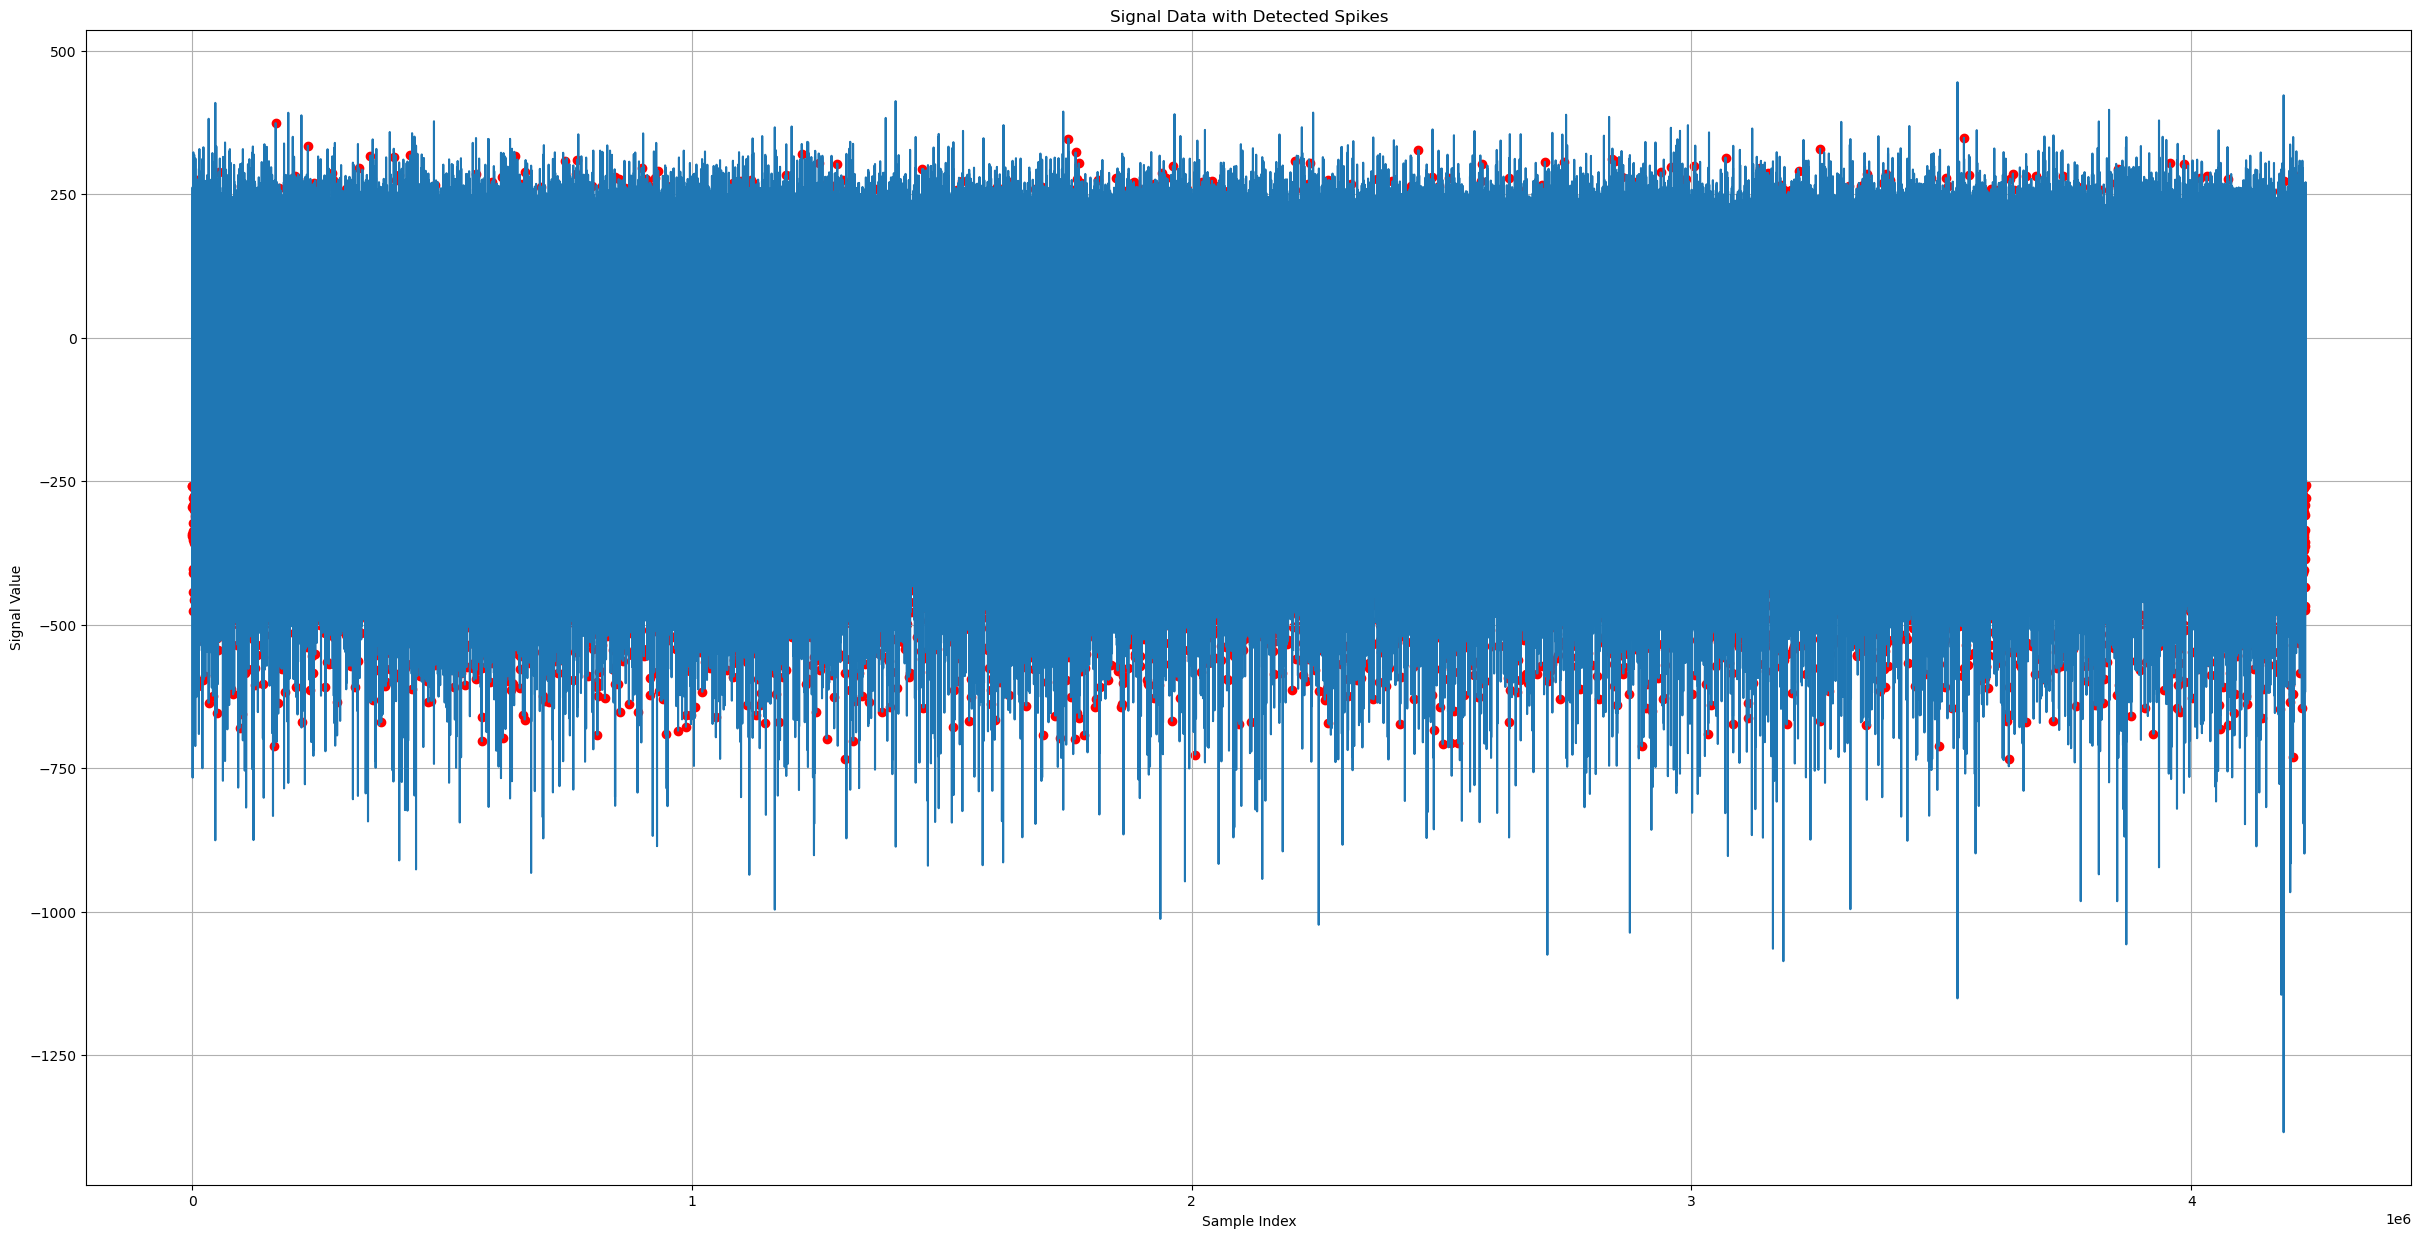

Clustering: 


  0%|          | 0/59 [00:00<?, ?it/s]


______________________________________________________________________________________________________________
Total spikes:  18042


Best cluster in the range 1 to 3:  3 , with a silhouette score of:  0.220223181976831   




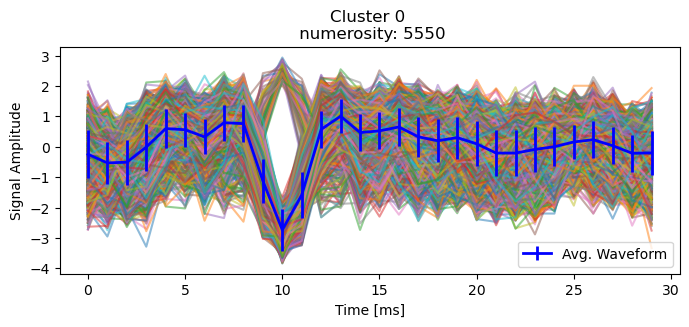

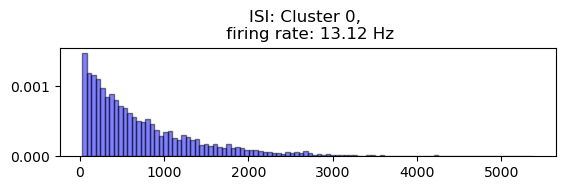

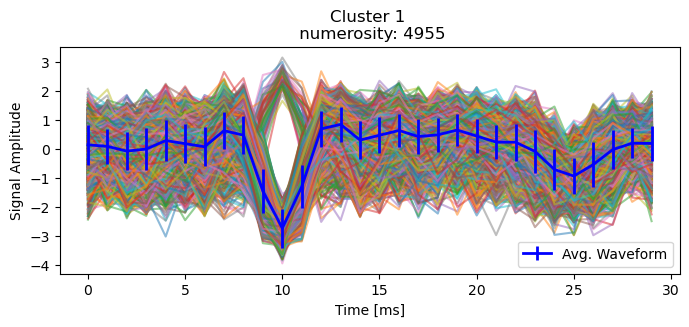

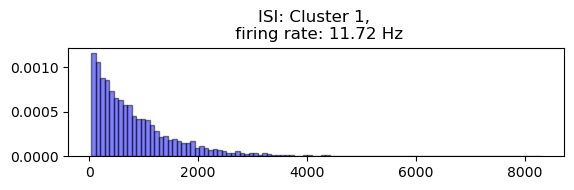

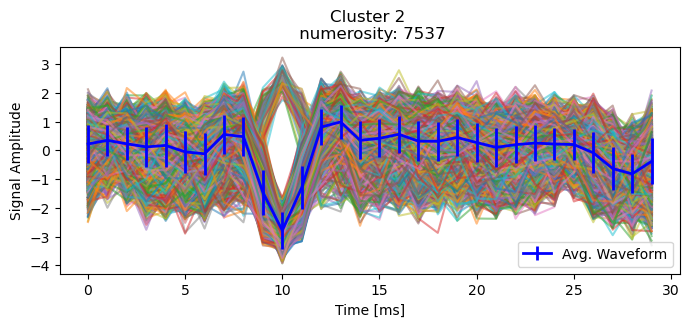

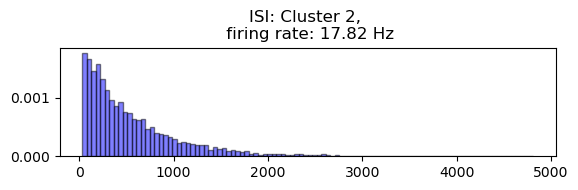


______________________________________________________________________________________________________________
Total spikes:  18628


Best cluster in the range 1 to 3:  3 , with a silhouette score of:  0.22275267647416377   




KeyboardInterrupt: 

In [47]:
final_neurons=[]
final_firing=[]
from NewLibraryENGcopia import *
import glob
#final=[]
list_dir=glob.glob("/Users/Gaia_1/Desktop/allh5filestutto/*.h5")
output_path='/Users/Gaia_1/Desktop'#/Data after SS lower silhouette'
#for file in tqdm(list_dir):
file=list_dir[1]
target=1
stim=0
if 'health' in file:
    target=0
if 'after' in file:
    stim=1
file_name = file.split("/")[-1]
print(file_name,':','target',target,'stimulation',stim)
neurons,firing=this_spike_sorting(file,output_path)
final_neurons.append(neurons)
final_firing.append(firing)
print(firing)

In [ ]:
import matplotlib.pyplot as plt

# Initialize lists to store numerical values
healthy_values_BL = []
healthy_values_af = []

lrrk2_values_BL = []
lrrk2_values_af = []

# Iterate through the list of lists
for firing in final_firing:
    file_name = firing[0]
    numerical_values = [float(arr[0]) for arr in firing[1:]]
    
    # Check if the file name contains 'after'
    if 'healthy' in file_name:
        if 'after' in file_name:
            healthy_values_af.extend(numerical_values)
        else:
            healthy_values_BL.extend(numerical_values)
    else:
        if 'after' in file_name:
            lrrk2_values_af.extend(numerical_values)
        else:
            lrrk2_values_BL.extend(numerical_values)
print('HEALTHY BL mean = ', np.mean(healthy_values_BL))
print('HEALTHY AFTER mean = ', np.mean(healthy_values_af))
print('LRRK2 BL mean = ', np.mean(lrrk2_values_BL))
print('LRRK2 AFTER mean = ', np.mean(lrrk2_values_af))
# Create box plots for each group
plt.figure(figsize=(6, 6))
plt.boxplot([healthy_values_BL,healthy_values_af, lrrk2_values_BL, lrrk2_values_af], labels=['Healthy BL','Healthy after', 'LRRK2 BL','LRRK2 after'])
plt.title('Distribution of Firing Rates')
plt.ylabel('Firing Rate')
#plt.savefig('firing_rates_boxplot_sm.jpg')
plt.show()


# Functions

In [ ]:
file_names = [firing[0] for firing in final_firing]
numerical_values = [[float(arr[0]) for arr in firing[1:]] for firing in final_firing]

# Save the file names and numerical values to a text file
output_path = "/Users/Gaia_1/Desktop"
with open(f"{output_path}/firings.txt", "w") as file:
    for file_name, values in zip(file_names, numerical_values):
        file.write(f"{file_name}: {', '.join(map(str, values))}\n")

In [49]:
file=list_dir[1]
prova=this_data_reading(file)

File Reading...
data shape:  (4229000, 60)
Data Filtering:


  0%|          | 0/59 [00:00<?, ?it/s]

In [88]:
all_pos=[]
all_neg=[]
for i,electrode in enumerate(tqdm(prova.columns)):
    channel=prova[electrode]
    #ind=windowed_spike_detection(channel)
    #ind=this_spike_detection(channel)
    pos, neg=new_find_all_spikes(channel)
    #all_ind.append(ind)
    all_pos.append(pos)
    all_neg.append(neg)


  0%|          | 0/59 [00:00<?, ?it/s]

positive spikes 43707 negative spikes 315 detected spikes: 44022 firing rate:  104.09553085835896
positive spikes 45365 negative spikes 268 detected spikes: 45633 firing rate:  107.90494206668244
positive spikes 45299 negative spikes 245 detected spikes: 45544 firing rate:  107.69449042326791
positive spikes 45476 negative spikes 263 detected spikes: 45739 firing rate:  108.15559233861433
positive spikes 45346 negative spikes 255 detected spikes: 45601 firing rate:  107.82927406006148
positive spikes 34502 negative spikes 710 detected spikes: 35212 firing rate:  83.2631827855285
positive spikes 38495 negative spikes 436 detected spikes: 38931 firing rate:  92.0572239300071
positive spikes 36224 negative spikes 548 detected spikes: 36772 firing rate:  86.95199810829983
positive spikes 37217 negative spikes 519 detected spikes: 37736 firing rate:  89.23149680775597
positive spikes 35482 negative spikes 588 detected spikes: 36070 firing rate:  85.29203121305274
positive spikes 28755 negat

In [89]:
#spike extraction:
pos_cut_outs=[]
neg_cut_outs=[]
all_new_pos=[]
all_new_neg=[]
print('Spike extraction: ')
for i,electrode in enumerate(tqdm(prova.columns)):
    ind=all_pos[i]
    #ind=all_ind[i]
    channel=prova[electrode]
    cut_outs1,all_pos1=this_cut_all(ind,channel)
    pos_cut_outs.append(cut_outs1)
    all_new_pos.append(all_pos1)
    ind=all_neg[i]
    cut_outs1,all_neg1=this_cut_all(ind,channel)
    neg_cut_outs.append(cut_outs1)
    all_new_neg.append(all_neg1)


Spike extraction: 


  0%|          | 0/59 [00:00<?, ?it/s]

115  spikes removed;   firing rate: 0.47 Hz
25865  spikes removed;   firing rate: 42.19 Hz
92  spikes removed;   firing rate: 0.42 Hz
26913  spikes removed;   firing rate: 43.63 Hz
84  spikes removed;   firing rate: 0.38 Hz
26981  spikes removed;   firing rate: 43.32 Hz
97  spikes removed;   firing rate: 0.39 Hz
26878  spikes removed;   firing rate: 43.98 Hz
96  spikes removed;   firing rate: 0.38 Hz
27349  spikes removed;   firing rate: 42.56 Hz
244  spikes removed;   firing rate: 1.10 Hz
20877  spikes removed;   firing rate: 32.22 Hz
160  spikes removed;   firing rate: 0.65 Hz
24988  spikes removed;   firing rate: 31.94 Hz
221  spikes removed;   firing rate: 0.77 Hz
22044  spikes removed;   firing rate: 33.53 Hz
216  spikes removed;   firing rate: 0.72 Hz
24135  spikes removed;   firing rate: 30.93 Hz
219  spikes removed;   firing rate: 0.87 Hz
21753  spikes removed;   firing rate: 32.46 Hz
335  spikes removed;   firing rate: 1.35 Hz
20092  spikes removed;   firing rate: 20.48 Hz
360

Clustering: 


  0%|          | 0/59 [00:00<?, ?it/s]


______________________________________________________________________________________________________________
Total spikes:  200
Clustering algorithm detected only one cluster


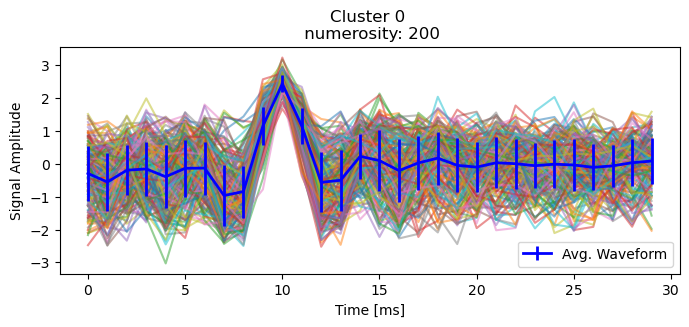

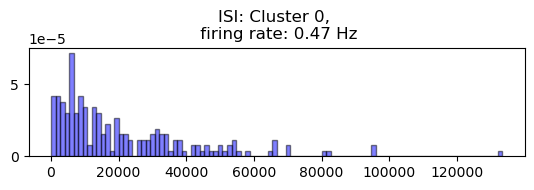


______________________________________________________________________________________________________________
Total spikes:  17842
Clustering algorithm detected only one cluster


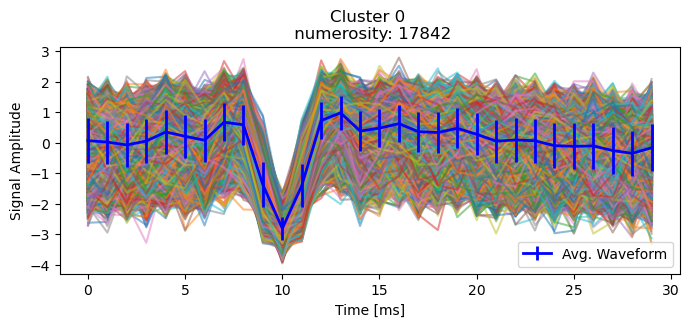

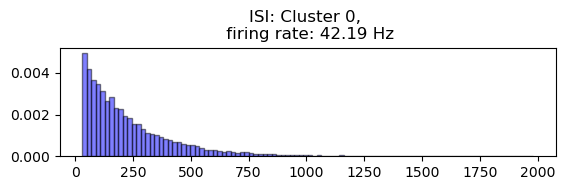


______________________________________________________________________________________________________________
Total spikes:  176
Clustering algorithm detected only one cluster


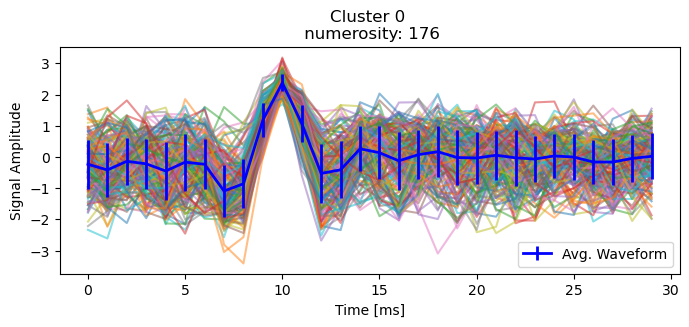

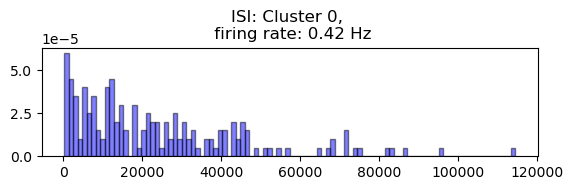


______________________________________________________________________________________________________________
Total spikes:  18452


KeyboardInterrupt: 

In [90]:
pos_final_data=[]
pos_final_firing=[]
#pos_final_firing.append(name_data)
neg_final_data=[]
neg_final_firing=[]
#neg_final_firing.append(name_data)
print('Clustering: ')
for channel in (tqdm(range(len(pos_cut_outs)))):
    channel_clusters1,final_firing1=this_clus(pos_cut_outs[channel],all_new_pos[channel],prova.iloc[:,channel])
    pos_final_data.append(channel_clusters1)
    pos_final_firing.append(final_firing1)
    channel_clusters1,final_firing1=this_clus(neg_cut_outs[channel],all_new_neg[channel],prova.iloc[:,channel])
    neg_final_data.append(channel_clusters1)
    neg_final_firing.append(final_firing1)

neurons=[]
for channel in pos_final_data:
    for neuron in channel:
        neurons.append(neuron)
for channel in neg_final_data:
    for neuron in channel:
        neurons.append(neuron)

In [18]:
def this_data_reading(input_path):
    name_data = input_path.split("/")[-1]
    #file reading:
    print('File Reading...')
    data = h5py.File(input_path,'r')
    data_readings = data['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData'][()]
    info = data['Data']['Recording_0']['AnalogStream']['Stream_0']['InfoChannel'][()]
    info_table = pd.DataFrame(info, columns = list(info.dtype.fields.keys()))
    labels = info_table['Label']
    readings = pd.DataFrame(data = data_readings.transpose(), columns = labels)
    fs = 10000 #Sampling Frequency
    print('data shape: ',readings.shape)
    prova=readings.drop([b'Ref'],axis=1)
    #prova=prova.iloc[0:750500, :]
    #prova=prova.iloc[:, :15]
    ref=readings[b'Ref']
    #ref=ref[0:750500]
    freqs, spectrogram = signal.welch(readings[b'Ref'].values, fs=10000, nfft=1024)
    noise_freq = freqs[spectrogram.argmax()]
    Q = 30
    b, a = scipy.signal.iirnotch(noise_freq, Q, fs)
    Q = 60
    b_2, a_2 = scipy.signal.iirnotch(2*noise_freq, Q, fs)
    channel = readings[b'Ref'].values
    pre_filtered_ref = scipy.signal.filtfilt(b, a, channel)
    pre_filtered_ref = scipy.signal.filtfilt(b_2, a_2, pre_filtered_ref) 
    ref=pre_filtered_ref

    #filtering:
    prova_rows = range(prova.shape[0])
    filt_prova = pd.DataFrame(data = 0, columns=prova.columns, index=prova_rows, dtype = "float32")
    lowcut = 300
    highcut = 3000
    fs=10000
    order=8
    b,a=butter_bandpass(lowcut,highcut,fs,order=order)
    filt_ref=filtfilt(b,a,ref)
    print('Data Filtering:')
    for x in tqdm(range(prova.shape[1])):
        filt_prova.values[:,x] = scipy.signal.filtfilt(b, a, prova.values[:,x])
    for electrode in prova.columns:
        filt_prova[electrode] = filt_prova[electrode] - filt_ref
    prova=filt_prova
    return prova

In [36]:
def this_spike_sorting(input_path,output_path):
    name_data = input_path.split("/")[-1]
    #file reading:
    print('File Reading...')
    data = h5py.File(input_path,'r')
    data_readings = data['Data']['Recording_0']['AnalogStream']['Stream_0']['ChannelData'][()]
    info = data['Data']['Recording_0']['AnalogStream']['Stream_0']['InfoChannel'][()]
    info_table = pd.DataFrame(info, columns = list(info.dtype.fields.keys()))
    labels = info_table['Label']
    readings = pd.DataFrame(data = data_readings.transpose(), columns = labels)
    fs = 10000 #Sampling Frequency
    print('data shape: ',readings.shape)
    prova=readings.drop([b'Ref'],axis=1)
    #prova=prova.iloc[0:750500, :]
    #prova=prova.iloc[:, :15]
    ref=readings[b'Ref']
    #ref=ref[0:750500]
    freqs, spectrogram = signal.welch(readings[b'Ref'].values, fs=10000, nfft=1024)
    noise_freq = freqs[spectrogram.argmax()]
    Q = 30
    b, a = scipy.signal.iirnotch(noise_freq, Q, fs)
    Q = 60
    b_2, a_2 = scipy.signal.iirnotch(2*noise_freq, Q, fs)
    channel = readings[b'Ref'].values
    pre_filtered_ref = scipy.signal.filtfilt(b, a, channel)
    pre_filtered_ref = scipy.signal.filtfilt(b_2, a_2, pre_filtered_ref) 
    ref=pre_filtered_ref

    #filtering:
    prova_rows = range(prova.shape[0])
    filt_prova = pd.DataFrame(data = 0, columns=prova.columns, index=prova_rows, dtype = "float32")
    lowcut = 300
    highcut = 3000
    fs=10000
    order=8
    b,a=butter_bandpass(lowcut,highcut,fs,order=order)
    filt_ref=filtfilt(b,a,ref)
    print('Data Filtering:')
    for x in tqdm(range(prova.shape[1])):
        filt_prova.values[:,x] = scipy.signal.filtfilt(b, a, prova.values[:,x])
    for electrode in prova.columns:
        filt_prova[electrode] = filt_prova[electrode] - filt_ref
    prova=filt_prova
    #detection:
    all_ind=[]
    print('Spike Detection: ')
    for i,electrode in enumerate(tqdm(prova.columns)):
        channel=prova[electrode]
        #ind=windowed_spike_detection(channel)
        #ind=this_spike_detection(channel)
        ind=this_find_all_spikes(channel)
        all_ind.append(ind)
    el=prova.columns[0]
    pr=prova[el]
    indss=all_ind[0]
    plt.figure(figsize=(30, 15))
    plt.plot(pr, label='Signal Data')
    plt.scatter(indss, [pr[i] for i in indss], c='red', marker='o', label='Spikes')
    plt.xlabel('Sample Index')
    plt.ylabel('Signal Value')
    #plt.legend()
    plt.grid(True)
    plt.title('Signal Data with Detected Spikes')
    #plt.axis([4180000,4223000,-800,300])
    plt.show()
    
    #spike extraction:
    cut_outs=[]
    all_new=[]
    print('Spike extraction: ')
    for i,electrode in enumerate(tqdm(prova.columns)):
        ind=all_ind[i]
        channel=prova[electrode]
        cut_outs1,all_new1=this_cut_all(ind,channel)
        cut_outs.append(cut_outs1)
        all_new.append(all_new1)    
    el=prova.columns[0]
    pr=prova[el]
    indss=all_new[0]
    plt.figure(figsize=(30, 15))
    plt.plot(pr, label='Signal Data')
    plt.scatter(indss, [pr[i] for i in indss], c='red', marker='o', label='Spikes')
    plt.xlabel('Sample Index')
    plt.ylabel('Signal Value')
    #plt.legend()
    plt.grid(True)
    plt.title('Signal Data with Detected Spikes')
    #plt.axis([4180000,4223000,-800,300])
    plt.show()

    # Clustering:
    final_data=[]
    final_firing=[]
    final_firing.append(name_data)
    print('Clustering: ')
    for channel in (tqdm(range(len(cut_outs)))):
        channel_clusters1,final_firing1=this_clus(cut_outs[channel],all_new[channel],prova.iloc[:,channel])
        final_data.append(channel_clusters1)
        final_firing.append(final_firing1)
    neurons=[]
    for channel in final_data:
        for neuron in channel:
            neurons.append(neuron)
    print(len(neurons),' neurons detected and sorted')
    adj_neur=[]
    counter = 0
    max_len=0
    for neuron in neurons:
        print('counter: ',counter,neuron.shape[0])
        if neuron.shape[0]>max_len:
            max_len=neuron.shape[0]
        counter+=1
    for neuron in neurons:
        if neuron.shape[0]<max_len:
            diff = max_len-neuron.shape[0]
            adj_neur.append(np.concatenate((neuron,np.zeros([diff]))))
    save_data = 'After'+name_data+'.txt'
    #np.savetxt("/Users/Gaia_1/Desktop/tesi/Data after SS/%s.txt" % save_data,adj_neur, delimiter=', ', fmt='%12.8f')
    np.savetxt(f"{output_path}/{save_data}.txt", adj_neur, delimiter=', ', fmt='%12.8f')

    print('saved: ',save_data)
    return neurons, final_firing


In [86]:
def new_find_all_spikes(data):
    spike_length=30 #3ms
    coeff=3
    thresh=coeff*(scipy.stats.median_abs_deviation(data,scale='normal'))
    ind, peaks_amp = scipy.signal.find_peaks(abs(data), height=thresh, distance= spike_length)
    ind_pos = data[ind] < 0 
    ind_neg = data[ind] > 0
    pos = ind[ind_pos]
    neg = ind[ind_neg]
    firing_rate=(len(pos)+len(neg))*10000/len(data)
    print('positive spikes',len(pos),'negative spikes',len(neg),'detected spikes:', len(pos)+len(neg), 'firing rate: ',firing_rate)
    return neg, pos


In [65]:
def this_find_all_spikes(data):
    abs_data=abs(data)
    spike_length=30 #3ms
    coeff=3
    thresh=coeff*(scipy.stats.median_abs_deviation(abs_data,scale='normal'))
    ind, peaks_amp = scipy.signal.find_peaks(abs(data), height=thresh, distance= spike_length)
    ind_pos=peaks_amp['peak_heights']>0
    ind_neg=peaks_amp['peak_heights']<0
    pos=ind[ind_pos]
    neg=ind[ind_neg]
    firing_rate=(len(ind)*10000)/len(data)
    print(len(pos),len(neg), ' spikes detected;  ', 'firing rate: {:.2f}'.format(firing_rate),'Hz')
    return pos,neg


def this_spike_detection(data):
    spike_length=30 #3ms (0.003s)
    window_length=600000 #60 sec (1min)
    neg_data=-(data)
    abs_data=abs(data)
    i=0
    ind=[]
    while i < len(data)-window_length:
        neg_window=neg_data[i:i+window_length]
        abs_window=abs_data[i:i+window_length]
        window=data[i:i+window_length]
        #coeff=4
        #if abso==0:
        coeff=3
        thresh=coeff*(scipy.stats.median_abs_deviation(window,scale='normal'))
        #else:
            #coeff=4
            #thresh=coeff*(scipy.stats.median_abs_deviation(abs_window,scale='normal'))
        ind1, peaks =find_peaks(neg_window, height=thresh,distance=spike_length)
        del peaks
        last=i
        if len(ind1):
            last=i+ind1[-1]
        ind.extend([index + i for index in ind1])
        i=last+spike_length #0.003 s (30ms)
    firing_rate=len(ind)*10000/len(data)
    print(len(ind), ' spikes detected;  ', 'firing rate: {:.2f}'.format(firing_rate),'Hz')
    return ind


def cut_all(alls,data):
    pre = 0.001
    post = 0.002
    fs=10000
    prima = int(pre*fs)
    dopo = int(post*fs)
    lunghezza_indici = len(alls)
    cut= np.empty([lunghezza_indici, prima+dopo])
    dim = data.shape[0]
    k=0
    coeff=1.5
    signal_std=np.std(data)
    signal_mean=np.mean(data)
    standard_mean=signal_mean
    standard_threshold=signal_std
    for i in alls:
        if (i-prima >= 0) and (i+dopo <= dim):
            spike= data[(int(i)-prima):(int(i)+dopo)].squeeze()
            cut[k,:] = spike
            k+=1
    standards=np.std(cut,axis=1)
    means=np.mean(cut,axis=1)

    thr1=coeff*standard_threshold
    thr2=coeff*standard_mean
    
    indices=np.where((standards<thr1)&(means<thr2))[0]

    filtered_alls = np.array(alls)[indices]
    filtered_cut=cut[indices]
    
    spike_means=np.mean(filtered_cut,axis=1,keepdims=True)
    spike_stds=np.std(filtered_cut,axis=1,keepdims=True)
    
    standardized_cuts=(filtered_cut-spike_means)/spike_stds
    
    firing_rate=len(indices)*10000/len(data)
    print(len(alls)-len(indices),' spikes removed;  ', 'firing rate: {:.2f}'.format(firing_rate),'Hz')
    return standardized_cuts,filtered_alls


In [80]:
def this_clus(cut,spike_list,data):
    from sklearn.cluster import KMeans
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.metrics import silhouette_score
    import numpy as np
    scale = StandardScaler()
    estratti_norm = scale.fit_transform(cut)
    print('\n______________________________________________________________________________________________________________')
    print('Total spikes: ', estratti_norm.shape[0])
    n_comp=3
    pca = PCA(n_components=n_comp)
    transformed = pca.fit_transform(estratti_norm)
    spike_list=np.array(spike_list)
    kmeans_score=[]
    final_data=[]
    final_firing=[]
    #for n in range (2,4):
    n=2
    model = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=400, tol=0.25, verbose=0, random_state=None, copy_x=True,  algorithm='lloyd')
    labels = model.fit_predict(transformed)
    silhouette_avg = silhouette_score(transformed, labels)
    kmeans_score.append(silhouette_avg)
    top_clusters_kmeans = kmeans_score.index(max(kmeans_score))+2
    if max(kmeans_score)>=0.4:
        print("\n\n\033[1;31;47mBest cluster in the range 1 to 3: ",top_clusters_kmeans,", with a silhouette score of: ",max(kmeans_score), "\u001b[0m  \n\n")
        model = KMeans(n_clusters=top_clusters_kmeans,  init='k-means++', n_init=10, max_iter=400, tol=0.25, verbose=0, random_state=None, copy_x=True,  algorithm='lloyd')
        labels = model.fit_predict(transformed)
    else:
        print('Clustering algorithm detected only one cluster')
        labels=np.zeros(len(spike_list),dtype=int)
    unique_labels=np.unique(labels)
    firings=np.zeros(len(unique_labels))
    color=[]
    for i in labels:
        color.append(plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
    for i,cluster_label in enumerate(unique_labels):
        cluster_data=cut[labels==cluster_label]
        mean_wave=np.mean(cluster_data, axis=0)
        std_wave=np.std(cluster_data, axis=0)
        
        filtered_cluster_data=cluster_data
        
        plotting_data=filtered_cluster_data.transpose()
        
        firings[i]=len(filtered_cluster_data)*10000/len(data)
        
        fig = plt.figure(figsize=(8,10))
        
        plt.subplot(3,1,i+1)
        plt.plot(plotting_data,alpha=0.5)
        
        plt.title(f'Cluster {i} \n numerosity: {len(filtered_cluster_data)}')
        plt.xlabel('Time [ms]')
        plt.ylabel('Signal Amplitude')
        mean_wave = np.mean(filtered_cluster_data, axis=0)
        std_wave = np.std(filtered_cluster_data, axis=0)
        plt.errorbar(range(mean_wave.shape[0]), mean_wave, yerr=std_wave, color='blue', linewidth=2, label='Avg. Waveform')
        plt.legend(loc='lower right')
        plt.show()
        ul=spike_list[labels==i]
        ull=ul
        #ull=ul[indices_to_keep]
        final_data.append(ull)
        final_firing.append(firings)
        plt.subplot(3, 1, i + 1)
        plt.hist(np.diff(ull), bins=100, density=True, alpha=0.5, color='blue', edgecolor='black')
        plt.title(f'ISI: Cluster {i}, \n firing rate: {format(len(final_data[i])*10000/len(data), ".2f")} Hz')
        plt.show()
        
    return final_data, final_firing


In [41]:
def this_cut_all(alls,data):
    pre = 0.001
    post = 0.002
    fs=10000
    prima = int(pre*fs)
    dopo = int(post*fs)
    lunghezza_indici = len(alls)
    cut= np.empty([lunghezza_indici, prima+dopo])
    dim = data.shape[0]
    k=0
    coeff=2
    signal_std=np.std(data)
    signal_mean=np.mean(data)
    standard_mean=signal_mean
    standard_threshold=signal_std
    for i in alls:
        if (i-prima >= 0) and (i+dopo <= dim):
            spike= data[(int(i)-prima):(int(i)+dopo)].squeeze()
            cut[k,:] = spike
            k+=1
    standards=np.std(cut,axis=1)
    means=np.mean(cut,axis=1)

    thr1=coeff*standard_threshold
    thr2=3*standard_mean
    
    indices=np.where((standards<thr1)&(means<thr2))[0]

    filtered_alls = np.array(alls)[indices]
    filtered_cut=cut[indices]
    
    spike_means=np.mean(filtered_cut,axis=1,keepdims=True)
    spike_stds=np.std(filtered_cut,axis=1,keepdims=True)
    
    standardized_cuts=(filtered_cut-spike_means)/spike_stds
    
    firing_rate=len(indices)*10000/len(data)
    print(len(alls)-len(indices),' spikes removed;  ', 'firing rate: {:.2f}'.format(firing_rate),'Hz')
    return standardized_cuts,filtered_alls
 